<a href="https://colab.research.google.com/github/fjobeir/ai/blob/main/stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
!pip install pingouin
import pingouin as pg

# Z-Test

---



In [ ]:
# Used when we want to compare the sample mean to the population mean
def zValue(xBar, mu, sigma, n):
    return (xBar - mu) / (sigma / np.sqrt(n))
# Used if we want to detect the critical sample mean
def xBar(z, mu, sigma, n):
    return mu + z * (sigma / np.sqrt(n))

# Used when we compare the mean of two samples
def zTwoSample(xBar1, xBar2, sigma1, sigma2, n1, n2):
    return (xBar1 - xBar2) / np.sqrt(sigma1**2 / n1 + sigma2**2 / n2)

# Used when we compare propotions within a sample
def zProp1(n, success, mean):
  p = success / n
  p0 = mean / n
  return (p - p0) / np.sqrt(p0 * (1 - p0) / n)

# Used when we compare propotions in two samples (number of successes)
def zProp2(n1, success1, n2, success2):
    pHat1 = success1 / n1
    pHat2 = success2 / n2
    pooled = (success1 + success2) / (n1 + n2)
    se = np.sqrt(pooled * (1 - pooled) * (1/n1 + 1/n2))
    return (pHat1 - pHat2) / se

In [ ]:
z = zValue(65, 64.5, 2.5, 20)
print(z)
print(stats.norm.cdf(z))

0.8944271909999159
0.8144533152386513


In [ ]:
z = zProp2(1000,150,1000,200)
print(z)
print(stats.norm.cdf(z))

-2.9424494316825
0.0016281348142060288


# T-Test
---



In [ ]:
# One sample T-Test
def tValue(xBar, mu, sigma, n):
    return (xBar - mu) / (sigma / np.sqrt(n))

# OR stats.ttest_1sam(data, mean)

# Two sample T-Test
def tTwoSample(xBar1, xBar2, sigma1, sigma2, n1, n2):
    pooled_variance =
    return (xBar1 - xBar2) / np.sqrt(sigma1**2 / n1 + sigma2**2 / n2)
# OR stats.ttest_ind()

# Paired T-Test when we have two related samples: the weights of individuals before and after participating in the Zumba training.

In [ ]:
t_statistic, p_value = stats.ttest_1samp(
    [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5],
    175.3)
print(t_statistic, p_value)

2.295568968083183 0.04734137339747034


In [ ]:
Brand_A = [2.5, 3.8, 2.3, 4.1, 3.0, 2.7, 3.5, 4.0, 2.8, 3.3]
Brand_B = [0.8, 1.6, 1.1, 2.4, 1.3, 0.9, 1.7, 2.1, 1.0, 1.5]

t_statistic, p_value = stats.ttest_ind(
    b = Brand_A,
    a = Brand_B,)
print(t_statistic, p_value/2)


-6.73609679265374 1.2933779130302395e-06


In [ ]:
t_statistic, p_value = stats.ttest_ind(
    b = [2.5, 3.2, 2.8, 3.5, 3.0, 2.7, 2.9, 3.1, 2.6, 3.3],
    a = [3.8, 3.2, 3.5, 3.1, 3.9, 3.0, 3.3, 3.6, 3.4, 3.7],
    equal_var=True)
print(t_statistic, p_value)

3.514976533962258 0.002473092237964833


In [ ]:
IQ_before=[101,124,89,57,135,98,69,105,114,106,97,121,93,116,102,71,88,108,144,99]
IQ_after=[113,127,89,70,127,104,69,127,115,99,104,120,95,129,106,71,94,112,154,96]
t_statistic, p_value = stats.ttest_rel(
    IQ_before,
    IQ_after,
    alternative='less')
print(t_statistic, p_value)

-2.5849213105659876 0.009079862169696327


In [ ]:
z = zValue(3.5, 3, 0.8, 25)
print(z)
print(1-stats.norm.cdf(z))

3.125
0.0008890252991083925


3.6335677938559874


In [ ]:
z = zTwoSample(2.87, 2.56, 1.08, 1.28, 150, 200)
print(z)
print(1 - stats.norm.cdf(z))

2.453219634102559
0.007079193063952549


In [ ]:
z = zProp1(750, 495, 750*0.6)
print(z)
print((1-stats.norm.cdf(z)))

3.354101966249688
0.0003981150787953913


In [ ]:
z = zProp2(195, 41, 605, 351)
print(z)

-8.985900954503084


In [ ]:
print(2 * stats.norm.cdf(z))

2.566230446480293e-19


In [ ]:
z = zTwoSample(120, 110, 15, 12, 30, 35)
print(z)
print(2 * (1- stats.norm.cdf(z)))

2.9342948217350298
0.003343064983343025


In [ ]:
z = zProp1(100, 65, 70)

In [ ]:
z

-1.0910894511799603

In [ ]:
1 - stats.norm.cdf(z)

0.8623832379625824

# Chi-squared

### Chi-Squared Test of Independence
**Function**: `scipy.stats.chi2_contingency`

**Usage**: This function is used to test the independence of two categorical variables in a contingency table.

In [ ]:
statistic, pvalue, dof, expected_freq = stats.chi2_contingency([
    [335,348, 318],
    [35, 23, 50],
])
print(statistic, pvalue)

11.519544916042339 0.003151828690194211


### Chi-Squared Goodness of Fit Test
**Function**: `scipy.stats.chisquare`

**Usage**: This function is used to test if a sample data fits a specific distribution.

In [ ]:
stats.chisquare(f_obs = [25, 15, 30, 10], f_exp = [24, 16, 20, 20])

Power_divergenceResult(statistic=10.104166666666668, pvalue=0.017701120648375493)

In [ ]:
observed = np.array([
    [20, 94, 84, 17],  # Hair color 1, different eye colors
    [68, 7, 119, 26],  # Hair color 2, different eye colors
    [5, 16, 29, 14],  # Hair color 3, different eye colors
    [15, 10, 54, 14]   # Hair color 4, different eye colors
])

# Perform the Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

# Convert to a DataFrame for better readability
observed_df = pd.DataFrame(observed, columns=["EyeColor1", "EyeColor2", "EyeColor3", "EyeColor4"],
                           index=["HairColor1", "HairColor2", "HairColor3", "HairColor4"])
expected_df = pd.DataFrame(expected, columns=["EyeColor1", "EyeColor2", "EyeColor3", "EyeColor4"],
                           index=["HairColor1", "HairColor2", "HairColor3", "HairColor4"])

# Display observed, expected frequencies, and test results
observed_df, expected_df, chi2_stat, p_value, dof

(            EyeColor1  EyeColor2  EyeColor3  EyeColor4
 HairColor1         20         94         84         17
 HairColor2         68          7        119         26
 HairColor3          5         16         29         14
 HairColor4         15         10         54         14,
             EyeColor1  EyeColor2   EyeColor3  EyeColor4
 HairColor1  39.222973  46.123311  103.868243  25.785473
 HairColor2  40.135135  47.195946  106.283784  26.385135
 HairColor3  11.675676  13.729730   30.918919   7.675676
 HairColor4  16.966216  19.951014   44.929054  11.153716,
 138.28984162600824,
 2.325286787098839e-25,
 9)

# ANOVA



This test helps determine whether there are statistically significant differences between the means of three or more independent (unrelated) groups.


### Levene's Test and Bartlett's Test:

`f_statistic, p_value = stats.levene([...])`

`f_statistic, p_value = stats.bartlett([...])`

**Purpose**: These tests specifically assess whether the variances of two or more groups are equal. They are designed to test the homogeneity of variances (homoscedasticity).

**Levene's Test**: It is more robust to deviations from normality and is often preferred when the normality assumption may not hold.

**Bartlett's Test**: It assumes normal distributions and is more sensitive to departures from normality. It is best used when the data is approximately normally distributed.

### ANOVA (f_oneway):

`f_statistic, p_value = stats.f_oneway([...])`

**Purpose**: The one-way ANOVA test is used to assess whether there are significant differences between the means of two or more groups. It implicitly assumes that the variances of the groups are equal (homoscedasticity) as one of its assumptions.

**Variance Testing**: ANOVA does not test for equality of variances directly; instead, it tests for differences in means while assuming that variances are equal. If the variances are not equal, the ANOVA results might be unreliable.

## Test Steps:

**a. Independence of Observations**
This is generally ensured by the study design and random sampling. No formal test is usually applied.

**b. Normality**
You can check if each group's data is approximately normally distributed using visual methods (like Q-Q plots) or statistical tests (like the Shapiro-Wilk test).

`_, p_value_A = stats.shapiro()`

**c. Homogeneity of Variances**
You can use Levene's test or Bartlett's test to check if the variances across the groups are equal.

If the assumptions are met, proceed with ANOVA. Otherwise, you should consider alternative approaches or modifications to ensure valid statistical analysis. Something like data transformation or kruskal test

`stats.kruskal([...])`

In [ ]:
cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]
m1 = [8, 9, 11, 12]
m2 = [6, 8, 10, 4]
m3 = [14, 12, 18, 9]
m4 = [20, 22, 25, 23]

_, p_value = stats.f_oneway(m1, m2, m3, m4)
print(p_value)

1.8124793267561276e-05


### Two-way Anova

**Purpose**: Two-way ANOVA (also known as factorial ANOVA) is used to examine the effect of two independent variables (factors) on a dependent variable and to explore interactions between the factors.

`pg.anova(data=df, dv='dependent_variable', between=['iv1', 'iv2'])`

**Example Scenario**: Suppose you are studying the effect of two different diets and two different exercise routines on weight loss. The two factors are diet and exercise, and their interaction may also affect the outcome.

In [ ]:
df = pd.read_csv('dosages.csv')

In [ ]:
df.head()

,Dietary,Supplement_Dosage,Test_values
0,Female,Low,35.6
1,Female,Medium,49.4
2,Female,High,55.2
3,Male,Low,92.2
4,Male,Medium,45.4


In [ ]:
pg.anova(data=df, dv='Test_values', between=['Dietary', 'Supplement_Dosage']).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Dietary,532.001,1,532.001,1.075,0.340,0.152
1,Supplement_Dosage,130.812,2,65.406,0.132,0.879,0.042
2,Dietary * Supplement_Dosage,2869.202,2,1434.601,2.899,0.132,0.491
3,Residual,2968.715,6,494.786,NaN,NaN,NaN


In [ ]:
df = pd.read_csv('Fertilizer.csv')
df.head()

,Fertilizer,Watering_Frequency,Plant_Height
0,A,Low,15.2
1,A,Medium,20.7
2,A,High,24.3
3,B,Low,18.4
4,B,Medium,23.1


In [ ]:
pg.anova(data=df, dv='Plant_Height', between=['Fertilizer', 'Watering_Frequency']).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Fertilizer,84.067,1,84.067,1.509,0.243,0.112
1,Watering_Frequency,100.634,2,50.317,0.903,0.431,0.131
2,Fertilizer * Watering_Frequency,50.034,2,25.017,0.449,0.649,0.070
3,Residual,668.500,12,55.708,NaN,NaN,NaN


In [ ]:
df = pd.read_csv('Teaching_Method.csv')
df.head()

,Education,Teaching_Method,Test_Score
0,High School,Traditional,72
1,High School,Interactive,85
2,College,Traditional,70
3,College,Interactive,92
4,High School,Traditional,74


In [ ]:
pg.anova(data=df, dv='Test_Score', between=['Education', 'Teaching_Method']).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Education,6.25,1,6.250,0.081,0.780,0.007
1,Teaching_Method,552.25,1,552.250,7.199,0.020,0.375
2,Education * Teaching_Method,4.00,1,4.000,0.052,0.823,0.004
3,Residual,920.50,12,76.708,NaN,NaN,NaN


In [ ]:
df = pd.read_csv('coffee.csv')
df.head()
pg.anova(data=df, dv='Number_of_Orders', between=['Age_Group', 'Coffee_Type']).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Age_Group,686.778,2,343.389,5.104,0.033,0.531
1,Coffee_Type,143.444,2,71.722,1.066,0.384,0.192
2,Age_Group * Coffee_Type,493.889,4,123.472,1.835,0.206,0.449
3,Residual,605.500,9,67.278,NaN,NaN,NaN


In [ ]:
Work_Condition = ['Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office', 'Office','Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote','Remote', 'Remote', 'Remote', 'Remote', 'Remote', 'Remote']

Management_Style = ['Directive', 'Autonomous', 'Collaborative', 'Collaborative', 'Directive', 'Directive', 'Autonomous', 'Autonomous', 'Directive', 'Autonomous', 'Autonomous', 'Autonomous', 'Collaborative','Collaborative', 'Collaborative', 'Autonomous', 'Collaborative','Collaborative', 'Directive', 'Autonomous', 'Directive','Directive', 'Directive', 'Collaborative']

Productivity_Score = [79, 75, 93, 68, 77, 71, 91, 83, 86, 92, 66, 74, 77, 94, 89, 85, 70, 92, 92, 76, 76, 84, 94, 94]

df = pd.DataFrame({
    'Work_Condition': Work_Condition,
    'Management_Style': Management_Style,
    'Productivity_Score': Productivity_Score
})

pg.anova(data=df ,dv='Productivity_Score', between=['Management_Style', 'Work_Condition']).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,Management_Style,11.429,2.0,5.715,0.060,0.942,0.007
1,Work_Condition,127.512,1.0,127.512,1.341,0.262,0.069
2,Management_Style * Work_Condition,54.154,2.0,27.077,0.285,0.756,0.031
3,Residual,1711.583,18.0,95.088,NaN,NaN,NaN


# KS Test

The Kolmogorov-Smirnov (KS) test is a non-parametric statistical test used to compare a sample's distribution with a reference probability distribution, or to compare the distributions of two samples. It assesses the goodness of fit between the observed data and the expected distribution.

**One-Sample KS Test**: This test compares the cumulative distribution function (CDF) of the sample data with the CDF of a reference distribution (e.g., normal, exponential). It determines if the sample data follows a specified distribution.

**Two-Sample KS Test**: This test compares the CDFs of two independent samples. It checks whether the two samples come from the same distribution.

### Applications
Goodness-of-Fit Testing: To check if a sample data set follows a specific distribution.
Comparing Two Distributions: To test if two sample distributions are significantly different from each other.

In [ ]:
d1 = [2.5, 3.8, 2.3, 4.1, 3.0, 2.7, 3.5, 4.0, 2.8, 3.3]
d2 = [0.8, 1.6, 1.1, 2.4, 1.3, 0.9, 1.7, 2.1, 1.0, 1.5]
statistic, p_value =  stats.kstest(d1, d2)
print(statistic, p_value)

0.9 0.00021650176448938054


# A/B Test

A/B testing, also known as split testing, involves comparing two variants—A and B—to evaluate which performs better in terms of a specific metric



# Correlation

Correlation is a statistical measure that describes the strength and direction of the relationship between two variables

### Correlation Coefficient

The correlation coefficient (often denoted as r) is a numerical value that ranges from -1 to 1:

*   r = 1: Perfect positive correlation.
*   r = -1: Perfect negative correlation.
*   r = 0: No correlation.

### Commonly used correlation coefficients include:

**Pearson's r**: Measures linear relationships between continuous variables.

`stats.pearsonr(x, y)`

**Spearman's rank correlation**: Measures monotonic relationships (both linear and non-linear) between ordinal or continuous variables.

`stats.spearmanr(x, y)`

**Kendall's tau**: Another measure for ordinal data that assesses the strength of association.



In [ ]:
def pearson_correlation(x, y):
    """
    Calculate the Pearson Correlation Coefficient between two variables.

    :param x: List or array of values for variable X.
    :param y: List or array of values for variable Y.
    :return: Pearson Correlation Coefficient (r).
    """
    x = np.array(x)
    y = np.array(y)

    mean_x = np.mean(x)
    mean_y = np.mean(y)

    covariance = np.mean((x - mean_x) * (y - mean_y))
    std_x = np.std(x, ddof=1)
    std_y = np.std(y, ddof=1)

    r = covariance / (std_x * std_y)

    return r

def spearman_rank_correlation(x, y):
    """
    Calculate Spearman's Rank Correlation Coefficient between two variables.

    :param x: List or array of values for variable X.
    :param y: List or array of values for variable Y.
    :return: Spearman's Rank Correlation Coefficient (ρ).
    """
    x = np.array(x)
    y = np.array(y)

    rank_x = stats.rankdata(x)
    rank_y = stats.rankdata(y)

    return pearson_correlation(rank_x, rank_y)


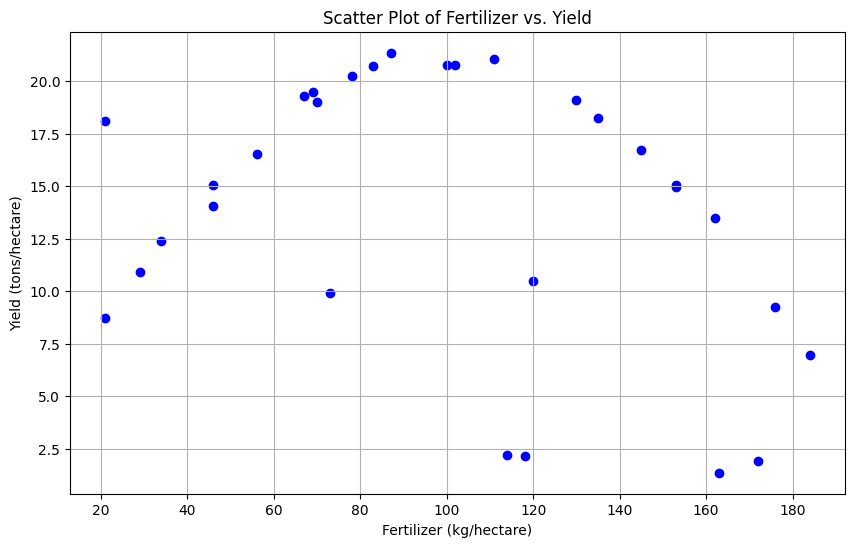

In [ ]:
a = [21, 21, 29, 34, 46, 46, 56, 69, 70, 67, 73, 83, 78, 87, 100, 102, 118, 111, 114, 120, 130, 135, 153, 145, 153, 162, 163, 172, 176, 184]
b = [18.118, 8.718, 10.918, 12.388, 15.068, 14.068, 16.528, 19.478, 19.01, 19.322, 9.942, 20.722, 20.232, 21.362, 20.8, 20.792, 2.152, 21.058, 2.208, 10.5, 19.1, 18.25, 15.082, 16.75, 14.982, 13.512, 1.362, 1.932, 9.248, 6.988]
stats.spearmanr(a, b)
plt.figure(figsize=(10, 6))
plt.scatter(a, b, color='blue', marker='o')

# Add labels and title
plt.xlabel('Fertilizer (kg/hectare)')
plt.ylabel('Yield (tons/hectare)')
plt.title('Scatter Plot of Fertilizer vs. Yield')

# Show grid
plt.grid(True)

# Show plot
plt.show()

# Feature Engineer

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models.

### Skewness and Kurtosis

skewness and kurtosis are two important statistical metrics that describe the shape and distribution of a dataset. They help to understand how the data deviates from a normal distribution, which is crucial when selecting and preparing features for machine learning models.

Skewness measures the asymmetry of a probability distribution. In other words, it indicates whether the data is skewed (i.e., shifted) to the left or the right compared to a normal distribution.

Symmetric Distribution: If the skewness is 0, the distribution is perfectly symmetric, which is the case in a normal distribution.

Positive Skew (Right Skew): If the skewness is greater than 0, the distribution has a long right tail, meaning the data has more values that are larger than the mean (e.g., income data, where most people earn low or moderate incomes, but a few earn very high amounts).

Negative Skew (Left Skew): If the skewness is less than 0, the distribution has a long left tail, meaning there are more values smaller than the mean.

`stats.skew([])` # 0, or >0 or <0

Kurtosis measures the "tailedness" or "peakedness" of a probability distribution. It describes how much of the data is in the tails compared to a normal distribution.

Mesokurtic (Kurtosis ≈ 3): This is the kurtosis of a normal distribution, where the distribution has a moderate peak and moderate tails.

Leptokurtic (Kurtosis > 3): A distribution with a higher kurtosis has fatter tails and a sharper peak, meaning there are more outliers in the data. It indicates that extreme values are more frequent than in a normal distribution.

Platykurtic (Kurtosis < 3): A distribution with a lower kurtosis has thinner tails and a flatter peak, meaning fewer outliers. This indicates that data points tend to be closer to the mean.

`stats.kurtosis([])` # will give a value which is >, =, < than 0 (already adjusted by subtracting 3)

In [ ]:
data = pd.read_csv('loan.csv')
data.dropna(inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [ ]:
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NewFeature
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,11967.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,10198.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,9943.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,13423.0


In [ ]:
nfMean = data['NewFeature'].mean() / 4

In [ ]:
data['Separator'] = data['NewFeature'].apply(lambda x: 1 if x > nfMean else 0)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,NewFeature,Separator
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,11967.0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,10198.0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,9943.0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,13423.0,1


In [ ]:
sep = data['Separator']
ls = data['Loan_Status']

array([2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1,

In [ ]:
statistic, pvalue, dof, expected_freq = stats.chi2_contingency([
    sep.values,
    ls.values
])
print(statistic, pvalue)

NameError: name 'stats' is not defined

In [ ]:
 contingency_table = pd.crosstab(data['Loan_Status'], data['Separator'])

In [ ]:
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
chi2, round(p_value, 4), dof, expected

(15.62341983693342,
 0.0001,
 1,
 array([[  4.00833333, 143.99166667],
        [  8.99166667, 323.00833333]]))

In [ ]:
kurt_value = stats.kurtosis([4, 6, 2, 18, 7, 2])
print(kurt_value)

0.41698931572535836


In [ ]:
v = stats.skew([38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38])

In [ ]:
v

0.5271318483027255

In [ ]:
df = pd.read_csv('loan.csv')

In [ ]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:

chn = df[df["Loan_Status"] == "N"]
contingency = pd.crosstab(chn['Gender'], chn['Credit_History'])
print(contingency)

Credit_History  0.0  1.0
Gender                  
Female           16   20
Male             63   75


In [ ]:
stats.skew([50,196,221,136,255,230,252,267,212,359,328,200,500,624,236,289,300,366])

1.020652643678196

In [ ]:
stats.skew([15, 20, 25, 25, 28, 30, 32, 35, 35, 35, 38, 40, 42, 45, 45, 48, 50, 52, 55, 60, 65, 70, 75, 75, 80, 90, 95, 100, 120, 250])

2.8005280091402485

In [ ]:
word = "SENDING"
res = 0

for i in range(len(word)-1):
  for j in range(i+1,len(word)):
    word_diff = j-i-1
    alpha_diff = abs(ord(word[i])-ord(word[j]))-1
    if word_diff == alpha_diff:
      res+=1
      print('letter 1 : ', word[i])
      print('letter 2 : ', word[j])
      print('word_diff : ',word_diff, 'alpha_diff : ', alpha_diff)
print(res)

letter 1 :  S
letter 2 :  N
word_diff :  4 alpha_diff :  4
letter 1 :  D
letter 2 :  G
word_diff :  2 alpha_diff :  2
letter 1 :  I
letter 2 :  G
word_diff :  1 alpha_diff :  1
3
